# 시계열 데이터
* reference : 금융공학 V: Introduction to financial Engineering with R 참조
* http://hdl.handle.net/10371/99003

In [102]:
library(quantmod)

# ^KS11 : KOSPI Composite Index
# https://finance.yahoo.com/quote/%5Eks11/

krx <- getSymbols('^KS11', from='2017-01-01', to=Sys.Date(), auto.assign=FALSE)

Warning message:
“^KS11 contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

In [103]:
rawData = krx
Date = index(rawData)
head(rawData)


CurrentI = rawData[,"KS11.Close"] 
ChangeI = diff(rawData[,"KS11.Close"])
ChangePe = diff(log(rawData[,"KS11.Close"]))
volumeI = rawData[,"KS11.Volume"]
OpeningI = rawData[,"KS11.Open"]
HighI = rawData[,"KS11.High"]
LowI = rawData[,"KS11.Low"]
DateNum = length(Date)

           KS11.Open KS11.High KS11.Low KS11.Close KS11.Volume KS11.Adjusted
2017-01-03   2034.31   2044.07  2028.47    2043.97      268100       2043.97
2017-01-04   2046.29   2046.29  2040.61    2045.64      371500       2045.64
2017-01-05   2045.52   2046.50  2039.49    2041.95      541300       2041.95
2017-01-06   2048.11   2051.84  2045.66    2049.12      455400       2049.12
2017-01-09   2053.18   2053.18  2046.47    2048.78      398300       2048.78
2017-01-10   2043.30   2046.78  2039.50    2045.12      512700       2045.12

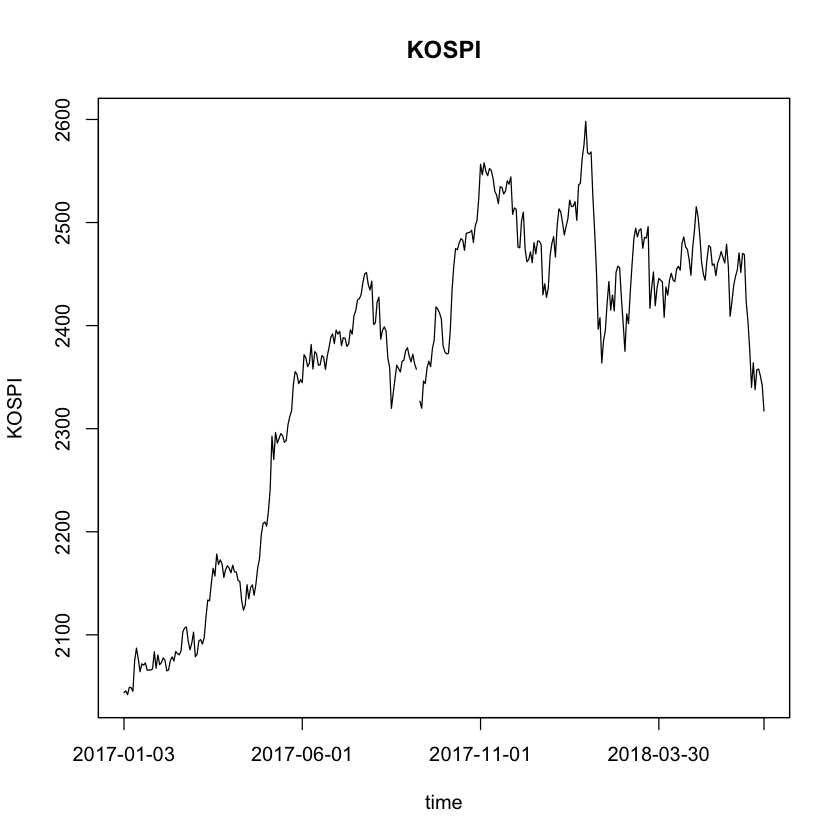

In [108]:
# kospi daily data
library(zoo)

CurrentZoo = zoo(CurrentI, seq(from=1, to=DateNum, by=1))
plot(CurrentZoo, xlab='time', ylab='KOSPI', xaxt='n', main='KOSPI')
axis(side=1, at=c(1, 101, 201, 301, 360), 
     labels = c(Date[1], Date[101], Date[201], Date[301], Date[360]))

* kospi지수 Brown운동 금융상품가격과정 $\{S_u | u \geq t\}$
* ${S_u}={S_t}exp\left(\sum_{j=t/ \delta+1}^N{x_j}\right)$

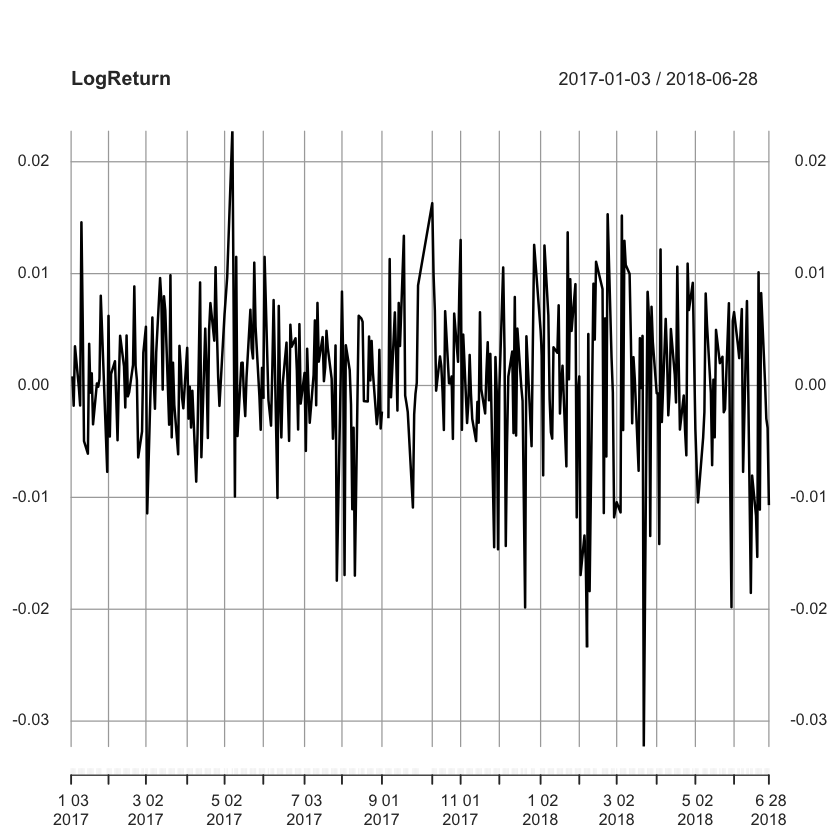

In [140]:
# KOSPI종가 지수과정이 지수Brown운동에 따르는지

options(digits=5)
library(moments)
library(zoo)

LogReturn = diff(log(CurrentI))
plot(LogReturn)

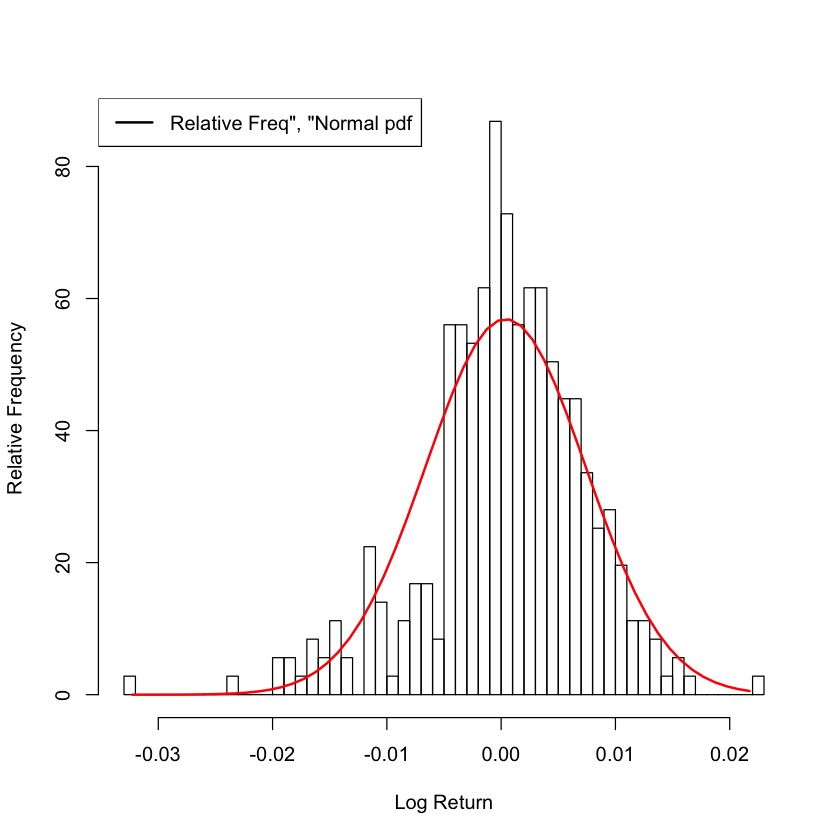

In [178]:
LRmean <- mean(LogReturn, na.rm=TRUE)
LRstd <- sd(LogReturn, na.rm=TRUE)
LRskew = skewness(LogReturn, na.rm=TRUE)
LRkurt = kurtosis(LogReturn, na.rm=TRUE)

hist(LogReturn, breaks=40, freq=FALSE, 
     xlab='Log Return', ylab = 'Relative Frequency', main="")
x <- seq(from = min(LogReturn, na.rm=TRUE), to = max(LogReturn, na.rm=TRUE), by = 0.001)
lines(x, dnorm(x, LRmean, LRstd), lwd=2, col='red')
legend('topleft', c('Relative Freq", "Normal pdf'), col = c("black", "red"), lwd=2)

In [186]:
LRmean # 로그수익률 평균
LRstd # 로그 표준편차
LRskew # 왜도
LRkurt # 첨도 (moments패키지에서는 +3을 사용)

# 동일 평균과 분산을 갖는 정규확률밀도함수를 비교
# Glivenko-Cantelli정리에 의하면, 정규성가정(normality assumption)하에서 두 그래프들은 매우 비스해야함
# 양쪽 꼬리들이 정규확률분포보다 무겁고 더 많은 질량(mass): heavy-tail

[1] 0.00038851

[1] 0.007012

KS11.Close 
  -0.67878

KS11.Close 
    4.7411

* 로그수익률의 정규성검정(normality test)

> * 히스토그램
> * 줄기잎그림(stem-and-leaf plot),
> * 상자그림(box-plot)
> * 정규확률산점도(normal probability plot)

> * Jarque-Bera검정 : 왜도(skewness)와 첨도(kurtosis)를 사용해서 정규성 검정
> * Kolmogorov-Smirnov검정 : Kolmogorov-Smirnov통계량 D를 통해
> * Lilliefor검정 등 : Kolmogorov-Smirnov통계량을 바탕으로 통계량 L을 통해 검정

In [203]:
head(LogReturn)

            KS11.Close
2017-01-03          NA
2017-01-04  0.00081673
2017-01-05 -0.00180550
2017-01-06  0.00350528
2017-01-09 -0.00016598
2017-01-10 -0.00178804

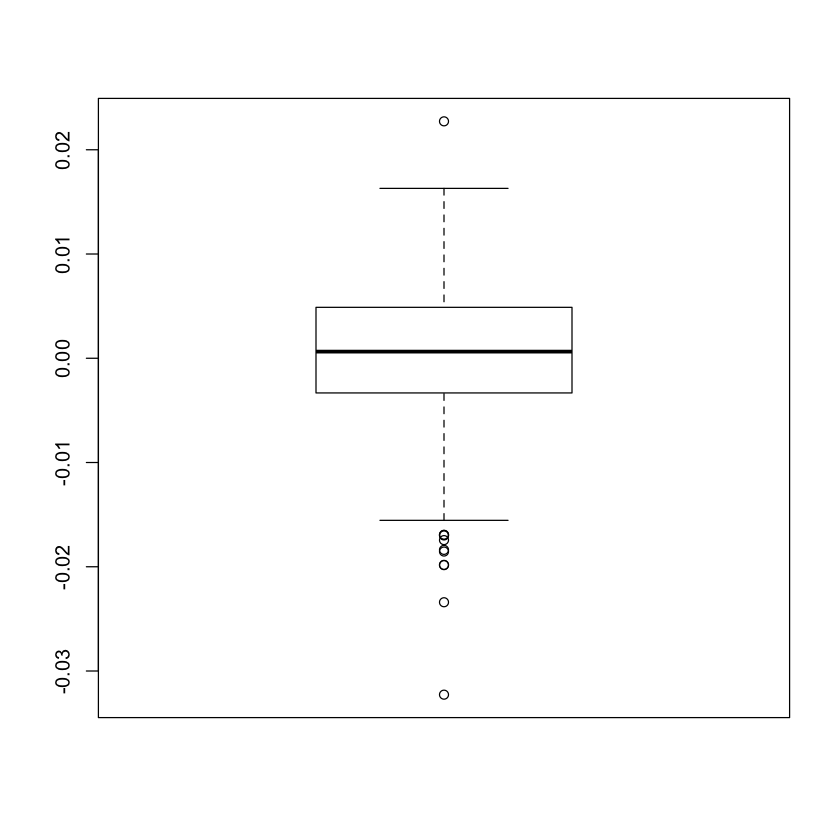

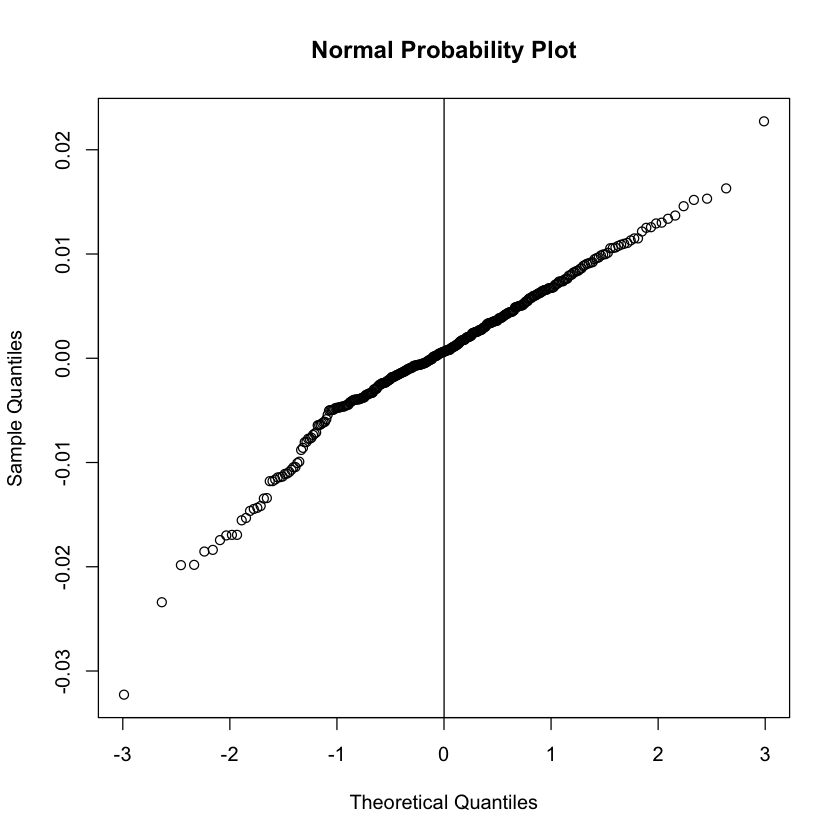

In [228]:
library(nortest)
library(moments)


# Plots
LogReturn2 <- na.omit(LogReturn)
boxplot(as.numeric(LogReturn2))
qqnorm(LogReturn2, main="Normal Probability Plot")
qqline(LogReturn2, datax=TRUE)

In [234]:
# Normal Test

LRmean = mean(LogReturn2)
LRstd = sd(LogRetrun2)
standLR = (LogReturn-LRmean)/LRstd
ks.test(standLR, pnorm) # 정규확류분포를 따른다는 귀무가설 기각
lillie.test(standLR) # nortest, 정규확률분포를 따른다는 귀무가설 기각
jarque.test(as.numeric(standLR)) # p-value 값이 낮으면, 정규확률분포를 따른다는 귀무가설 기각

# 결론
# 각 검정법은 변수 LogReturn이 정규확률분포를 따른다는 귀무가설을 기각
# 코스피지수가 기하Brown운동을 따른다고 할 수 없음


	One-sample Kolmogorov-Smirnov test

data:  standLR
D = 0.969, p-value <2e-16
alternative hypothesis: two-sided



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  standLR
D = 0.969, p-value <2e-16



	Jarque-Bera Normality Test

data:  as.numeric(standLR)
JB = NA, p-value = NA
alternative hypothesis: greater


## 자기상관성
> * 시계열에서는 자기상관성(autocorrelation property = (계열상관 serial correaltion))이 없음을 검정
> * 확률과정의 자기상관성을 정의하기 위해 확률과정이 정상적(stationary) 가정
> * 시차(lag)에 의해서 자기공분산(autocovariance)과 자기상관계수(autocorrelation coefficient)를 정의

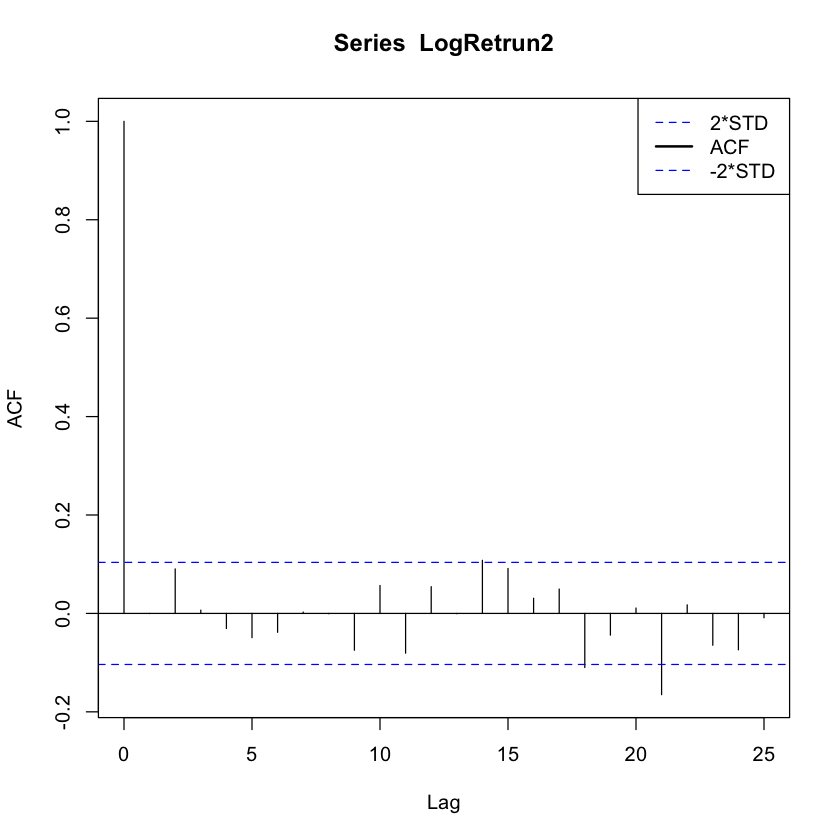

In [238]:
acf(LogRetrun2)
legend('topright', c("2*STD", "ACF", "-2*STD"),
      lty=c('dashed', 'solid', 'dashed'), col=c('blue', 'black', 'blue'),
      lwd=c(1,2,1))

# 시차 21를 제외한 나머지시차에서 표본자기상관계수는 유의수준 5%인 신뢰구간 안에 포함됨
# 로그수익률이 자기상관성을 갖지 않는 것처럼 보임

## AR(1)모형
> * 시계열데이터에서 현재시점의 관찰값과 과거 관찰값들로 나타낼 수 있는 부분과 예측불가능한 부분으로 나눌 수 있으며, 이 중 예측 불가능한 부분을 예측오차로 간주하고, 일반적으로 백색잡음(white noise)이라 부름 : $E({v_t})=0$, 분산은 시점 t에 의존하지 않는 상수 ${\sigma}^2$이라고 가정
> * 오차의 각각 시점의 값들은 서로 무상관(uncorrelated)또는 서로 독립이라 가정
> * 일반적으로 오차의 확률분포로 정규확률분포를 적용
> * 실제 데이터에서는 백색잡음은 정규확률분포보다 꼬리가 무거운 확률분포를 따르는 경우가 많음

> * ${y_t}=\sum_{i=0}^\infty{\phi^i}{v_{t-i}}$

> * ${E(y_t)}=\sum_{i=0}^\infty{\phi^i}{E(v_{t-i})}$
